In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

data = pd.read_csv('/content/dermatology_database_1.csv')

data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, svm_preds, zero_division=0))
print("Accuracy:", accuracy_score(y_test, svm_preds))

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds, zero_division=0))
print("Accuracy:", accuracy_score(y_test, rf_preds))


SVM Results:
              precision    recall  f1-score   support

           1       0.81      1.00      0.90        22
           2       0.48      1.00      0.65        14
           3       1.00      0.93      0.96        14
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        12
           6       0.67      1.00      0.80         2

    accuracy                           0.71        72
   macro avg       0.49      0.65      0.55        72
weighted avg       0.56      0.71      0.61        72

Accuracy: 0.7083333333333334

Random Forest Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accurac

In [9]:
z_scores = zscore(X)
abs_z_scores = abs(z_scores)

threshold = 3
non_outliers = (abs_z_scores < threshold).all(axis=1)

X_filtered = X[non_outliers]
y_filtered = y[non_outliers]

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

svm_model.fit(X_train_filtered, y_train_filtered)
svm_preds_filtered = svm_model.predict(X_test_filtered)

rf_model.fit(X_train_filtered, y_train_filtered)
rf_preds_filtered = rf_model.predict(X_test_filtered)

print("\nSVM Results after removing outliers:")
print(classification_report(y_test_filtered, svm_preds_filtered, zero_division=0))
print("Accuracy:", accuracy_score(y_test_filtered, svm_preds_filtered))

print("\nRandom Forest Results after removing outliers:")
print(classification_report(y_test_filtered, rf_preds_filtered, zero_division=0))
print("Accuracy:", accuracy_score(y_test_filtered, rf_preds_filtered))




SVM Results after removing outliers:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       0.30      1.00      0.46         6
           3       1.00      1.00      1.00         9
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         4

    accuracy                           0.69        51
   macro avg       0.44      0.60      0.48        51
weighted avg       0.57      0.69      0.60        51

Accuracy: 0.6862745098039216

Random Forest Results after removing outliers:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.83      0.83      0.83         6
           3       1.00      1.00      1.00         9
           4       0.92      0.92      0.92        12
           5       1.00      1.00      1.00         4

    accuracy                           0.96        51
   macro avg    

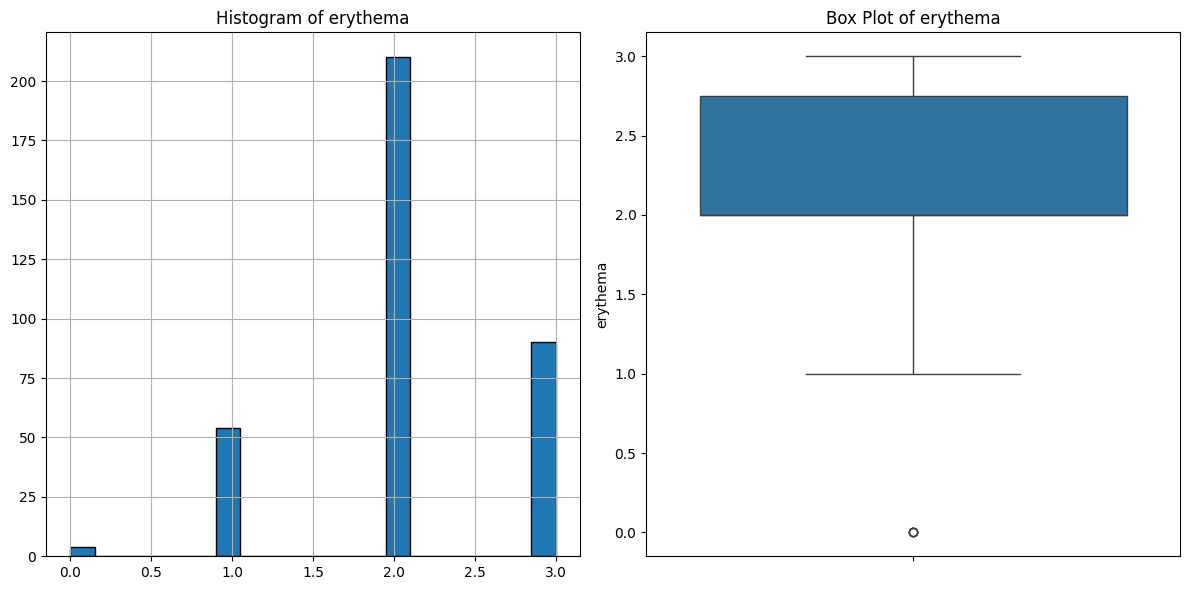

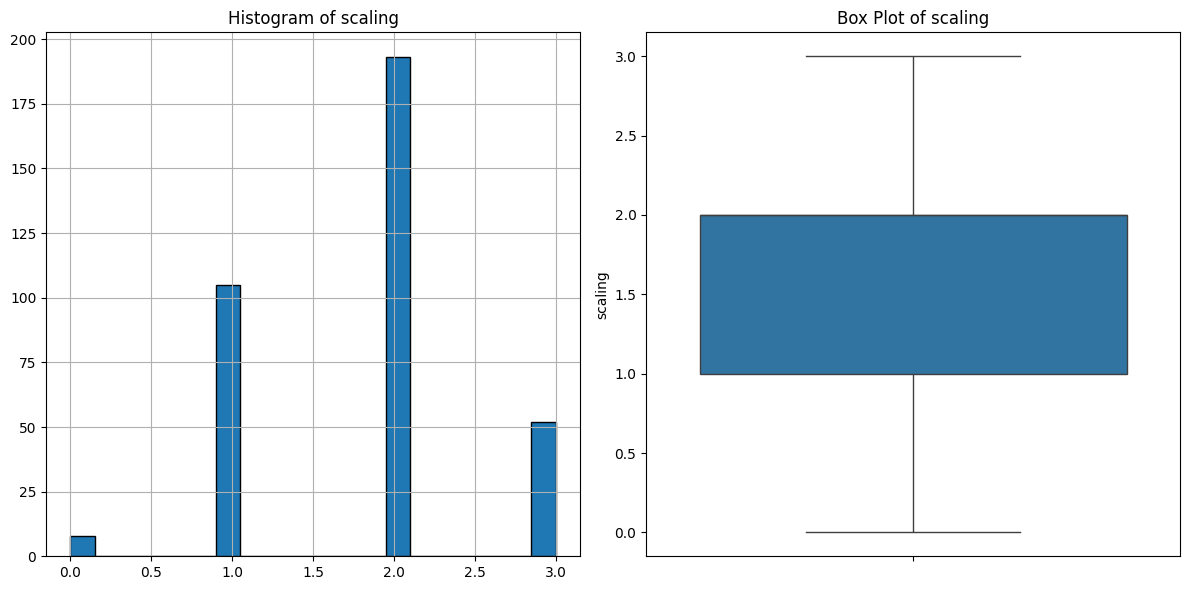

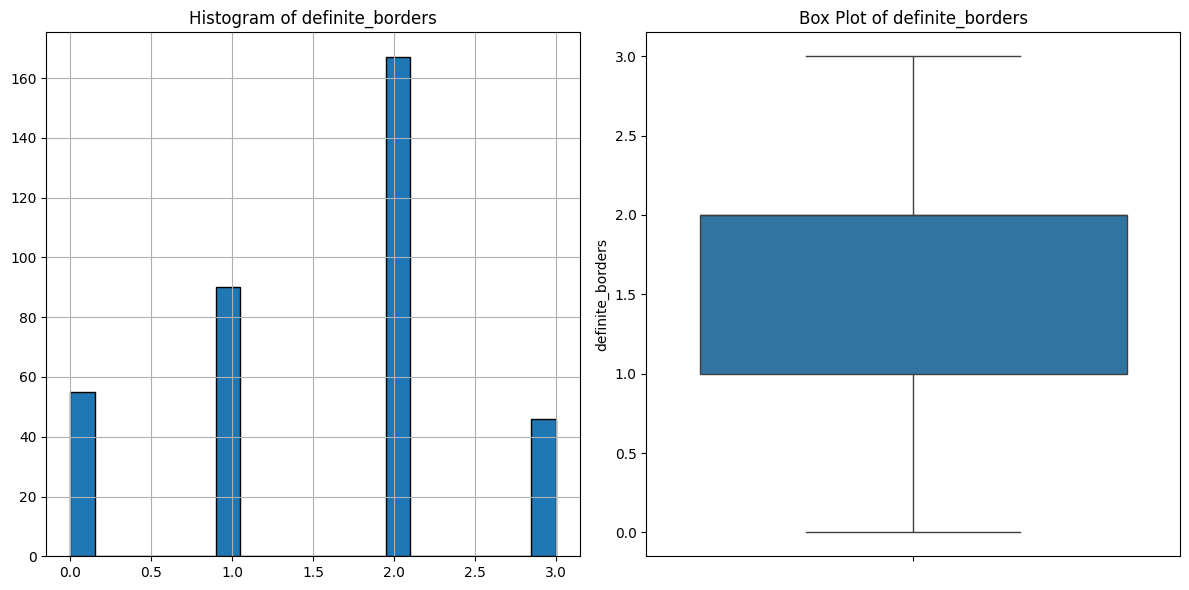

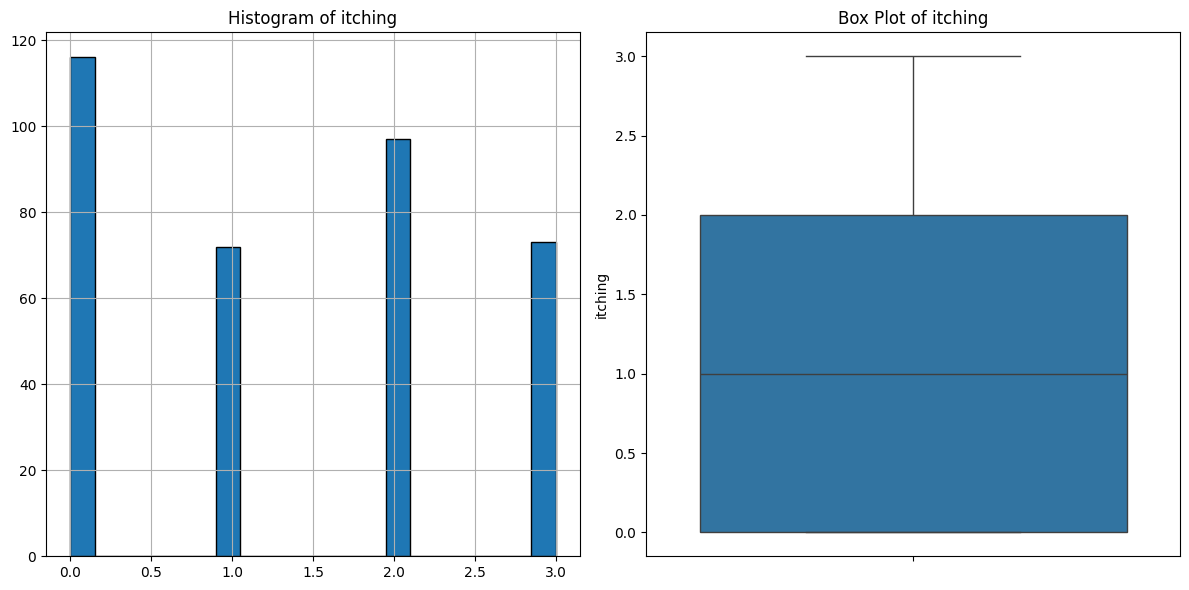

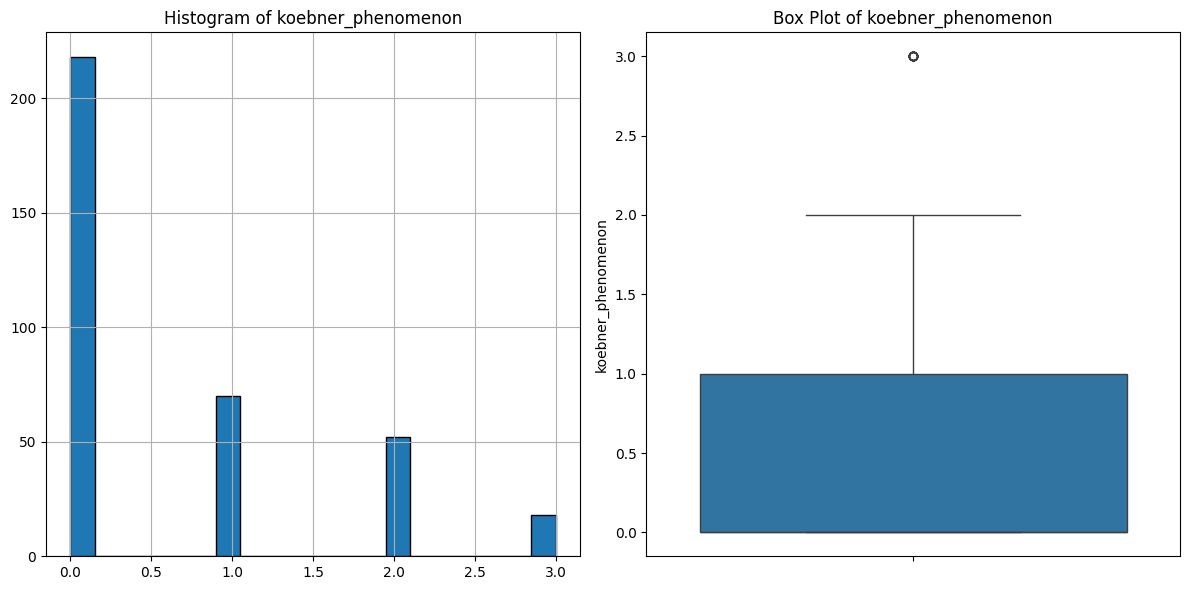

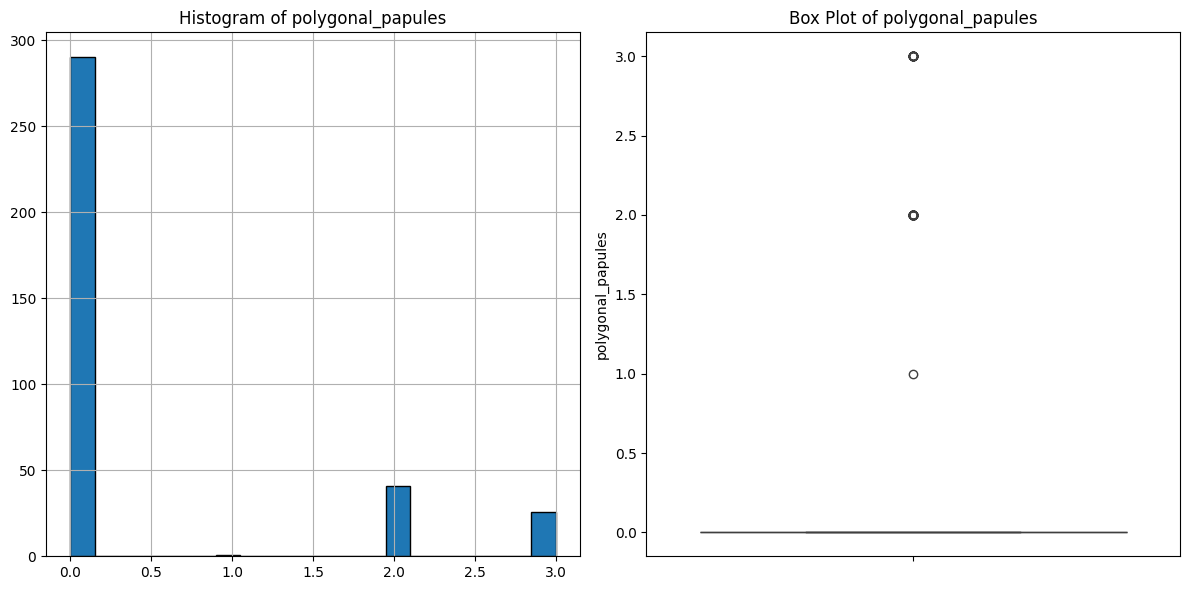

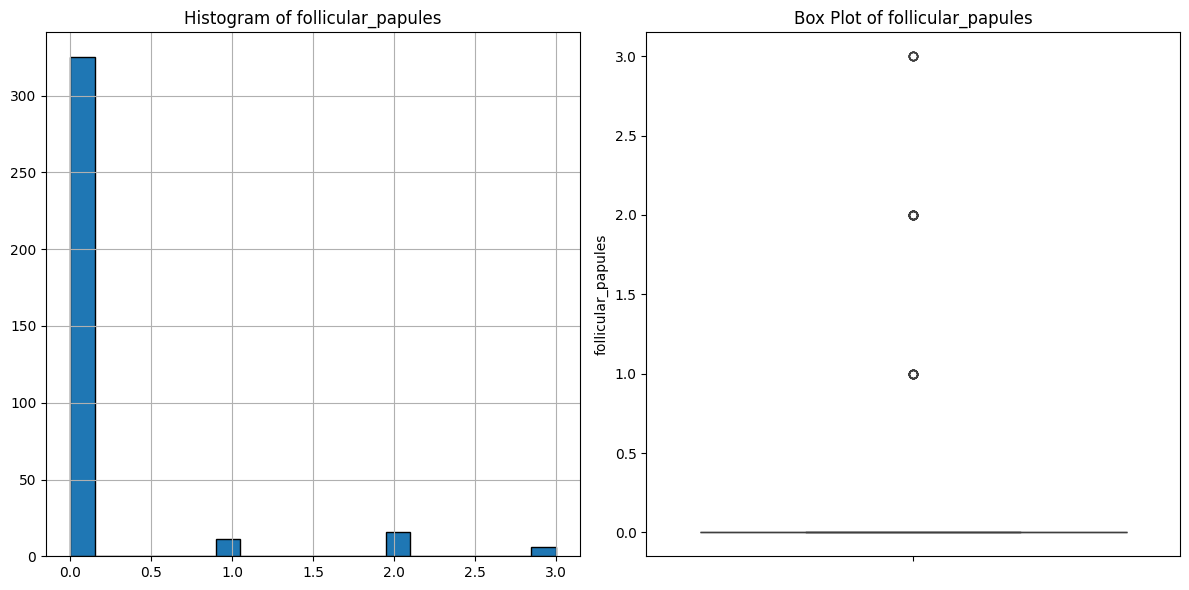

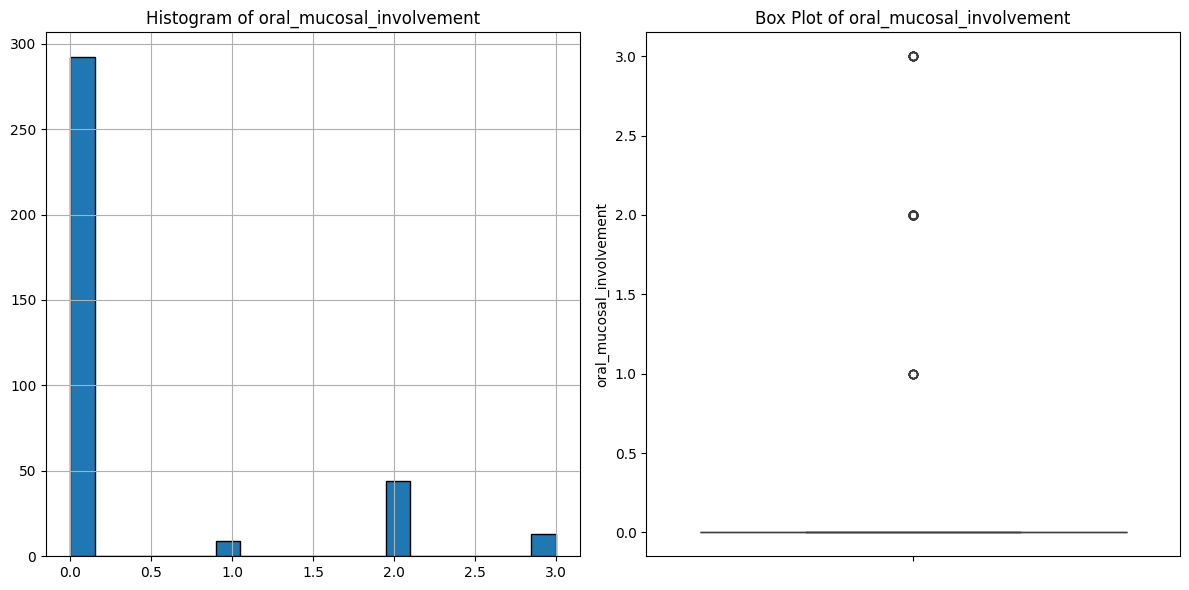

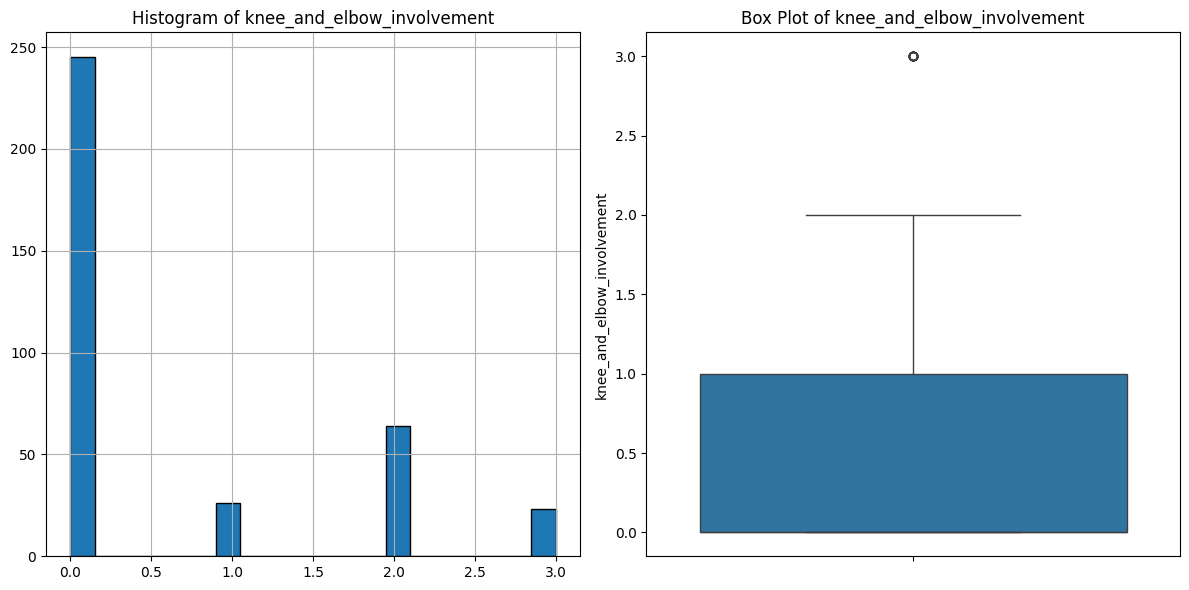

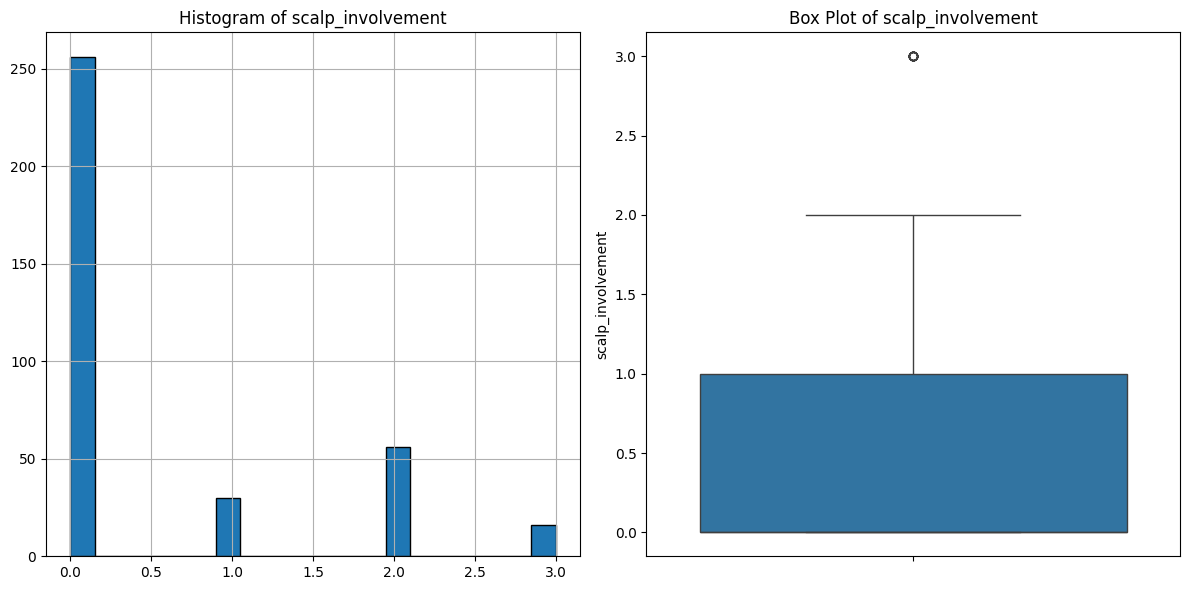

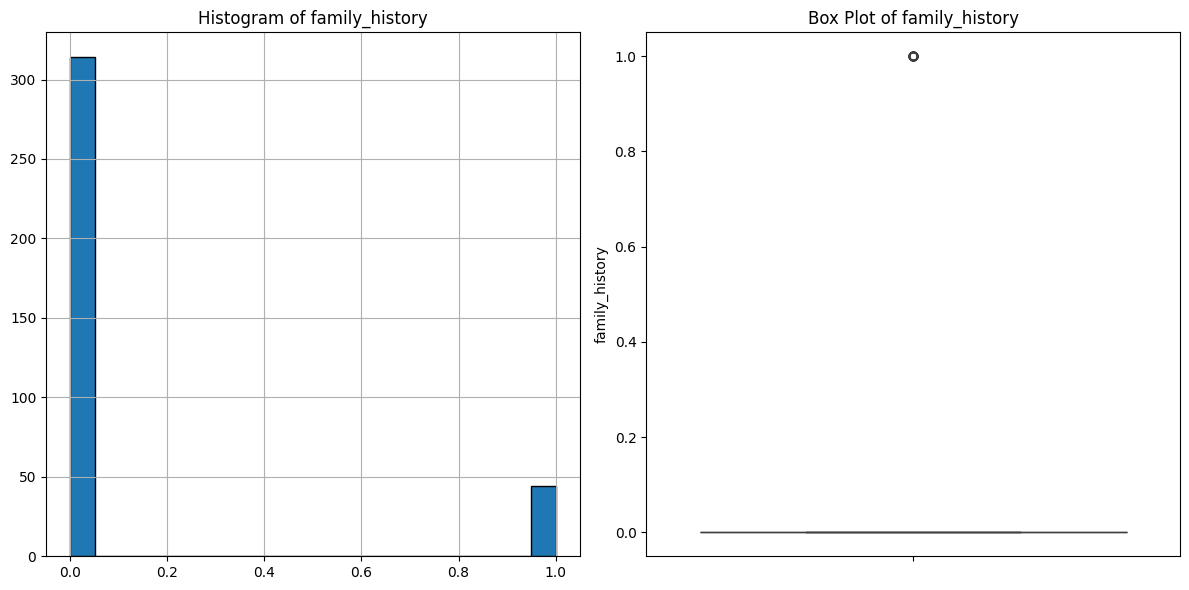

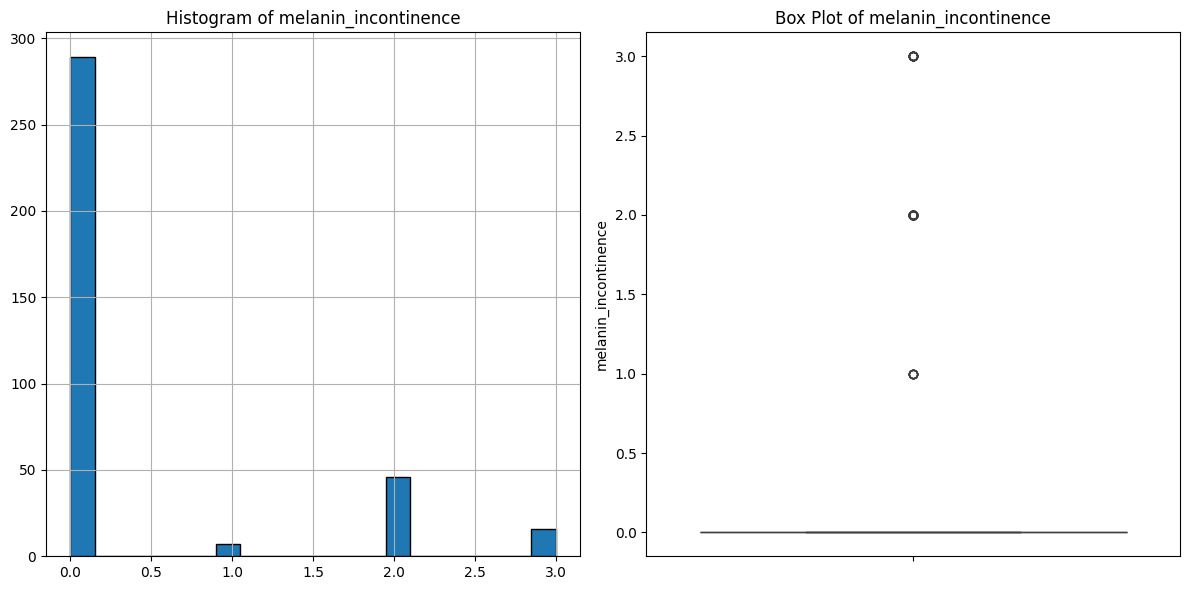

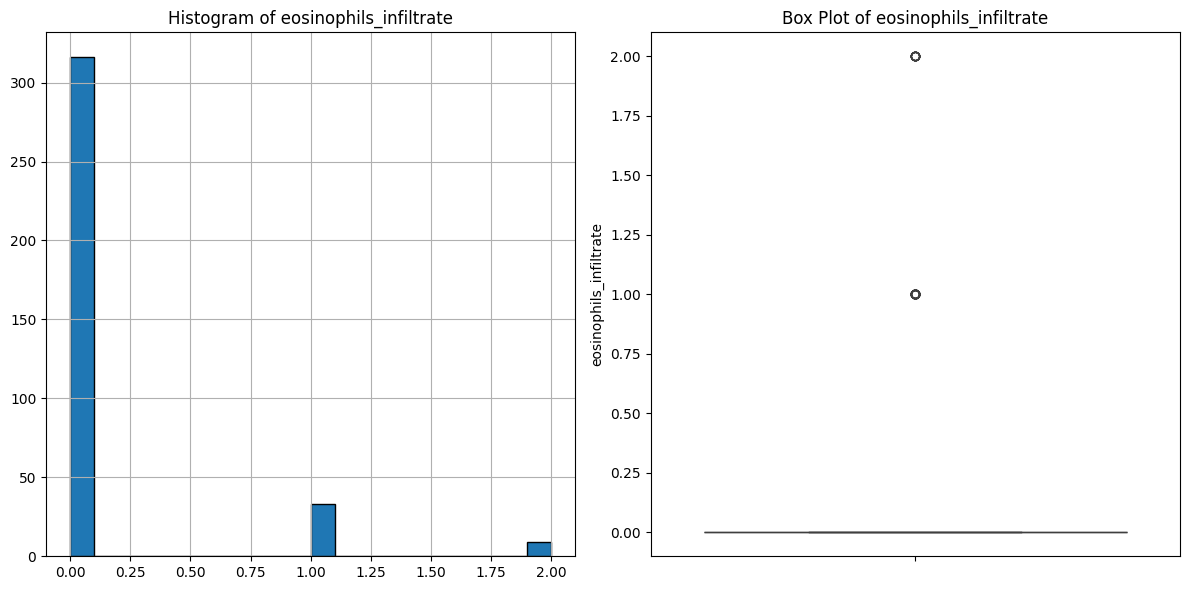

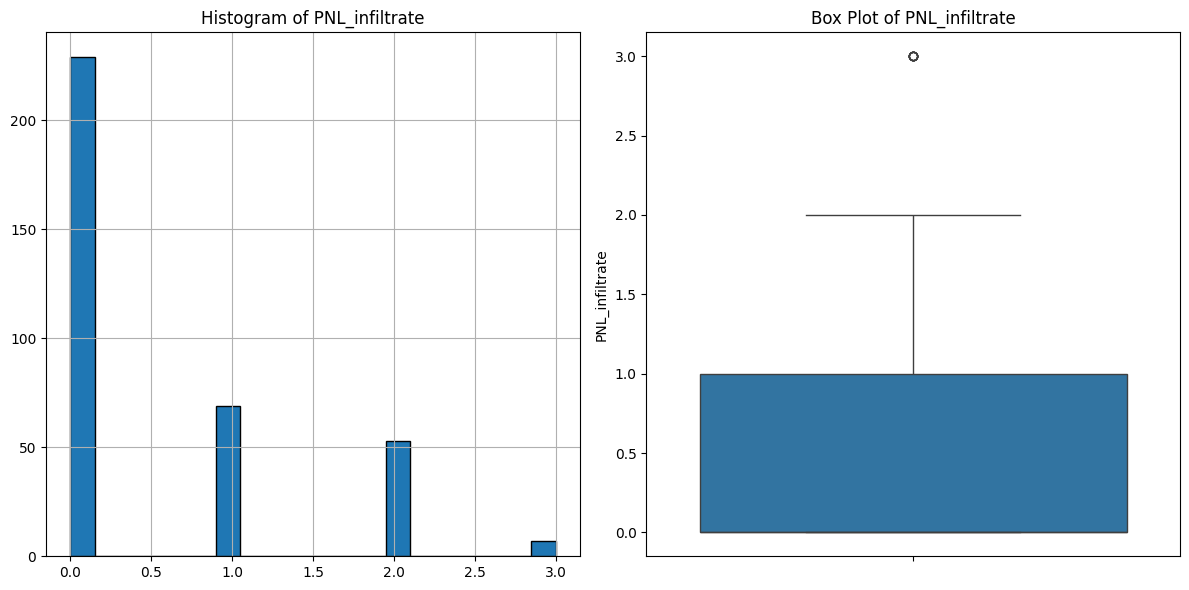

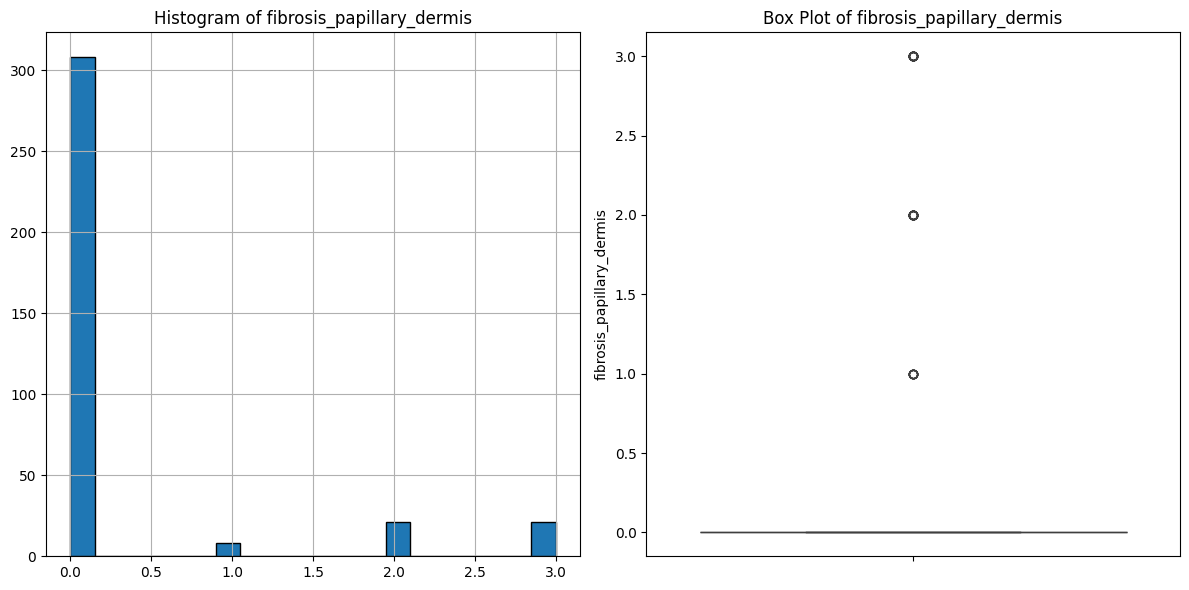

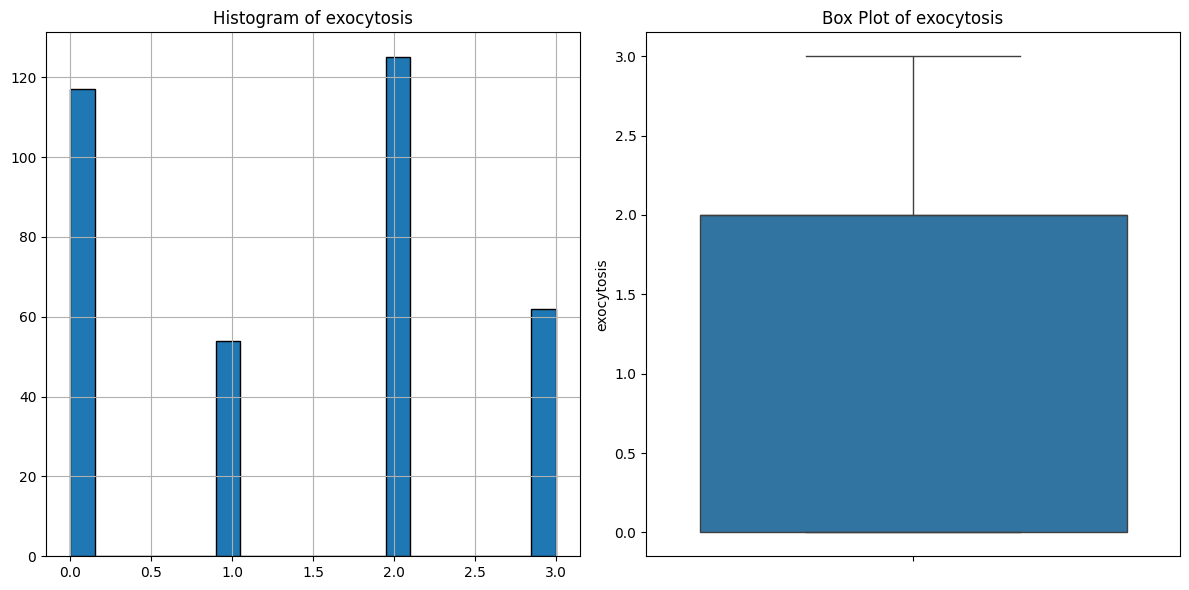

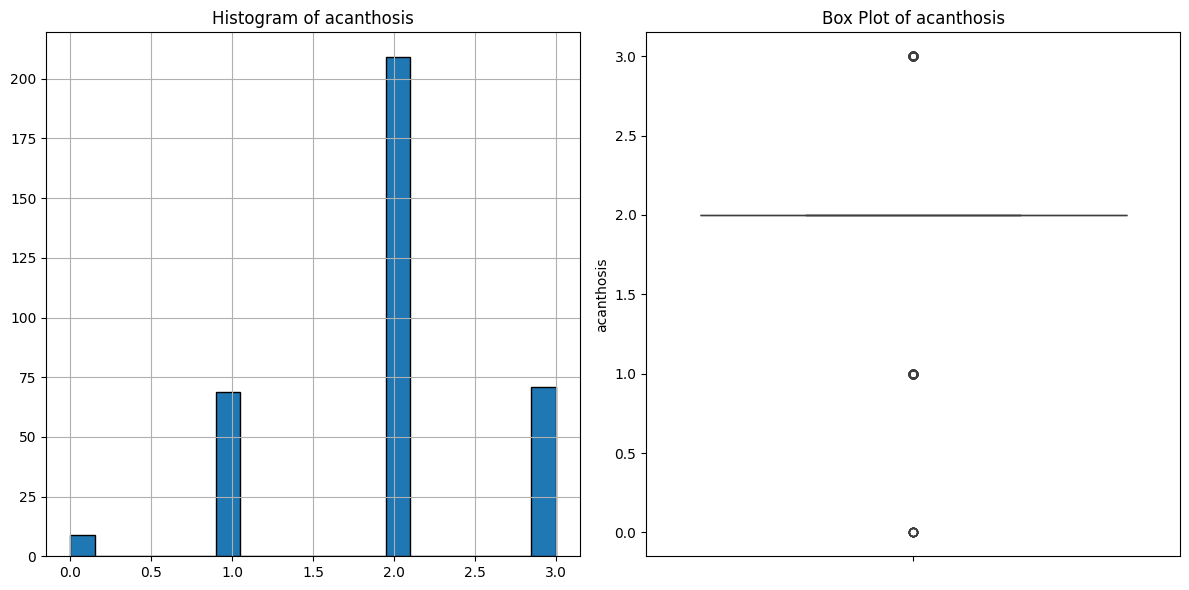

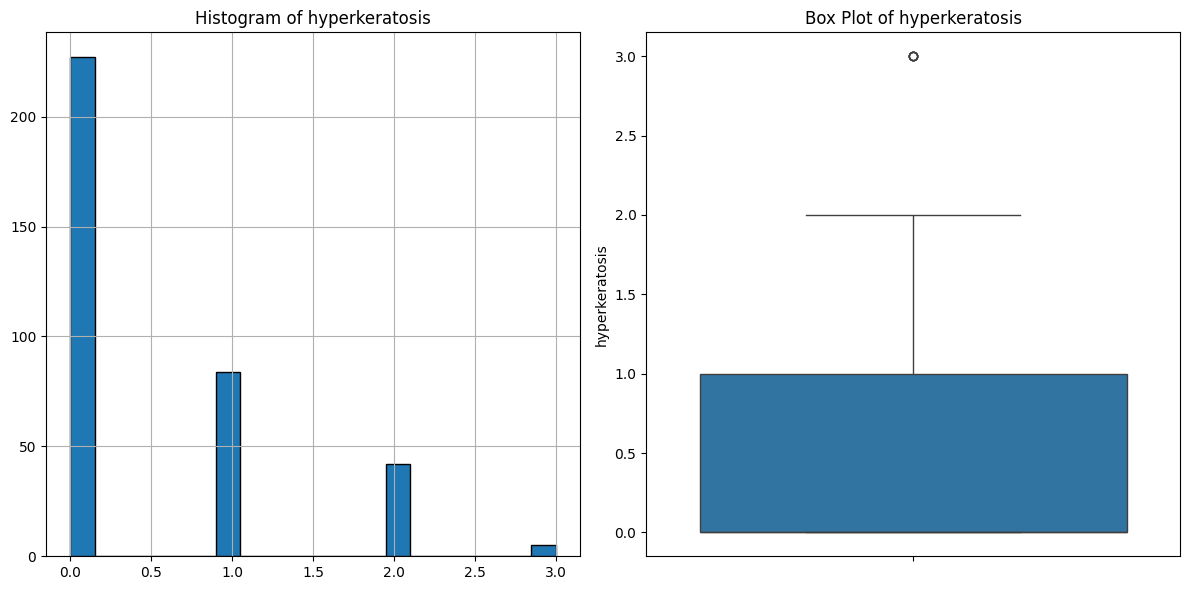

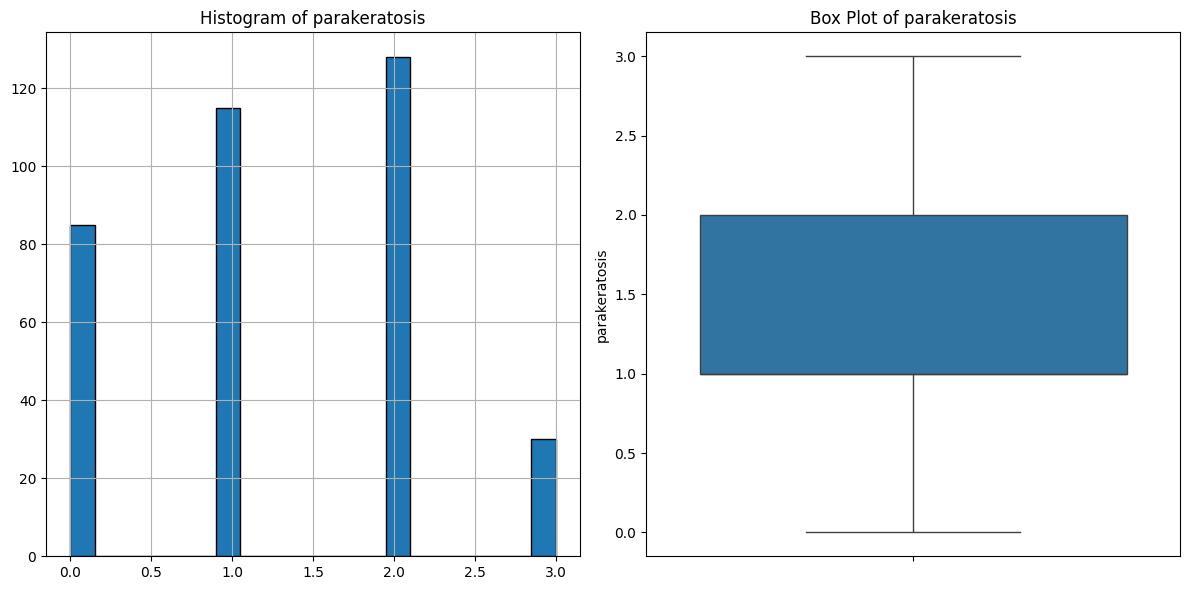

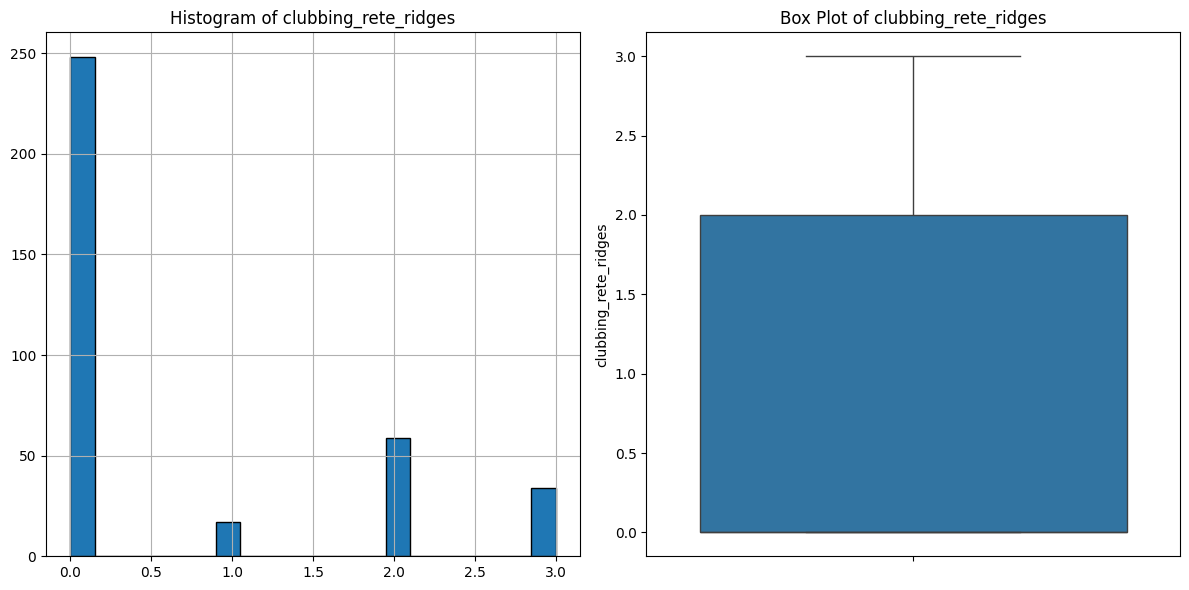

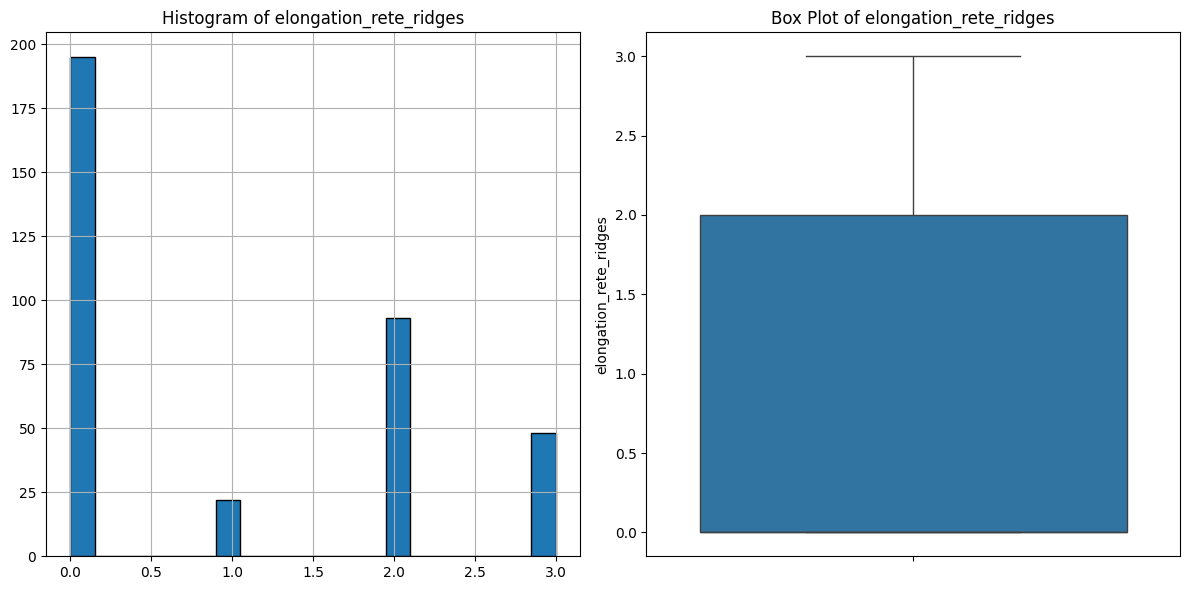

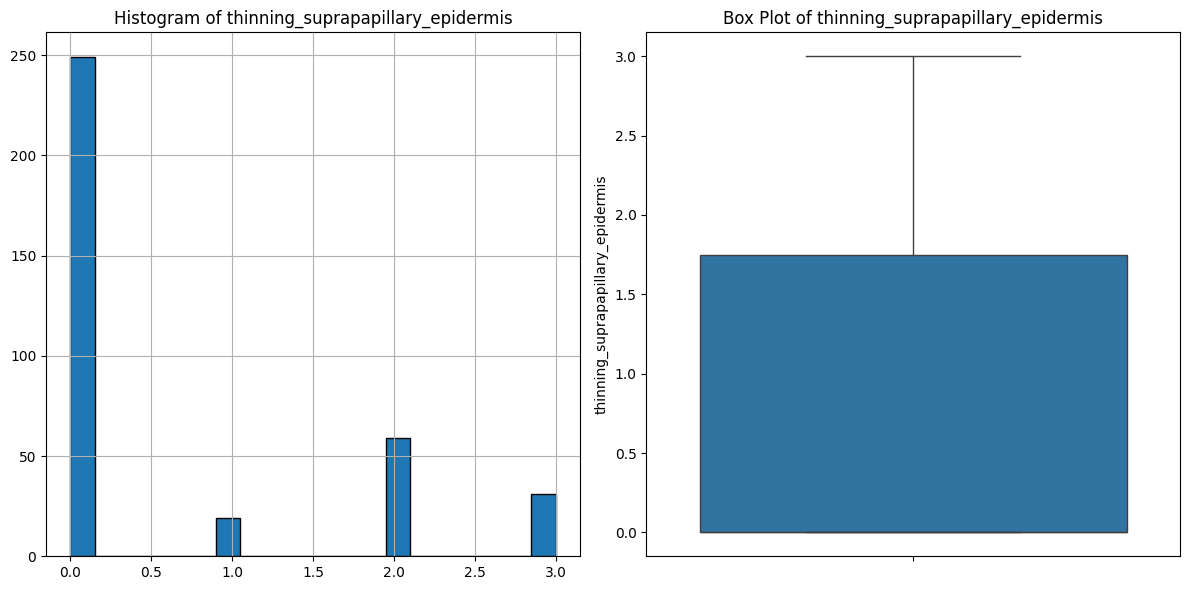

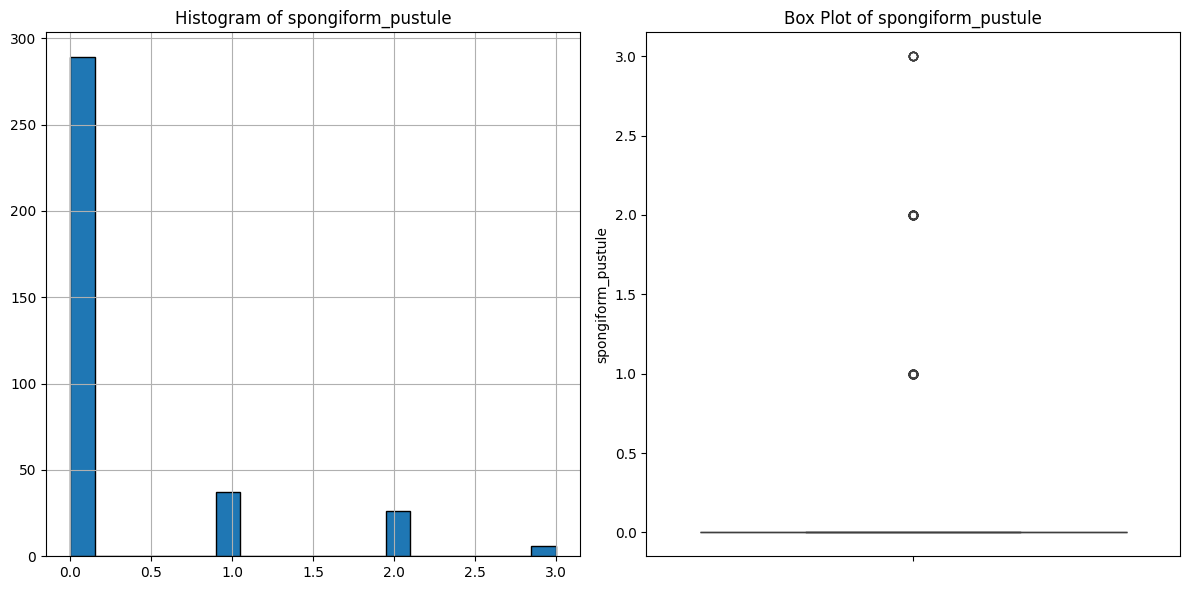

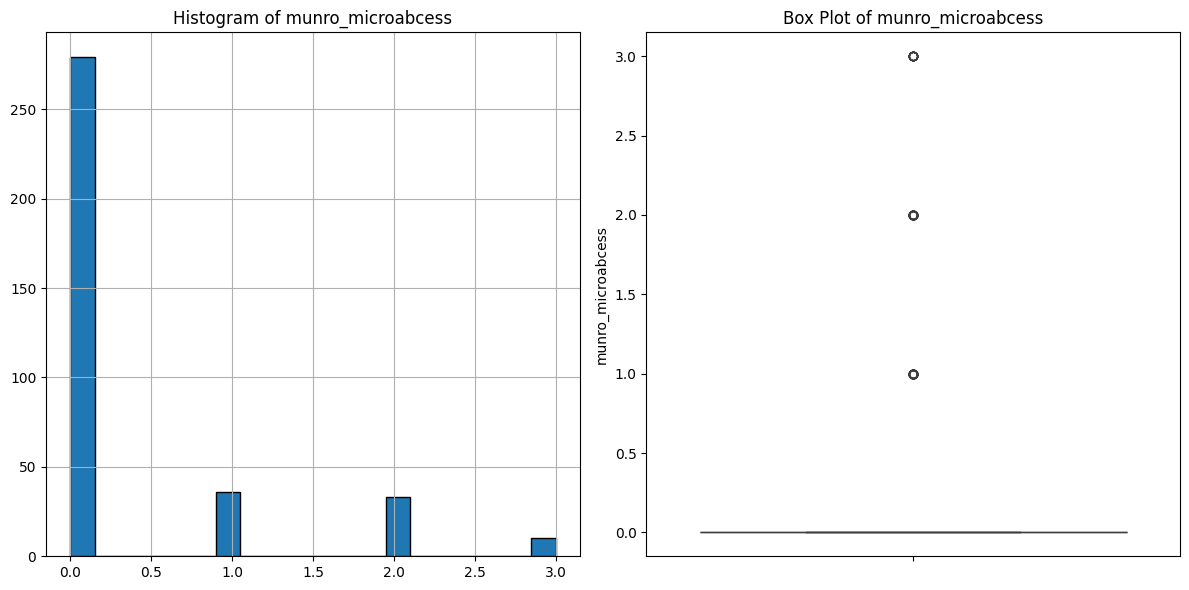

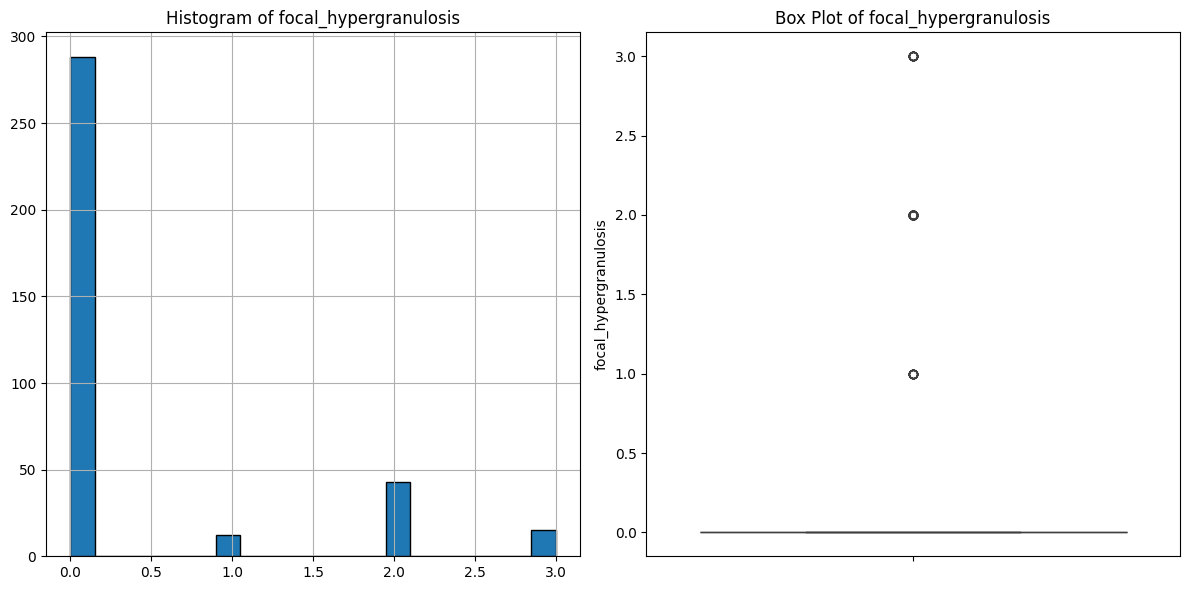

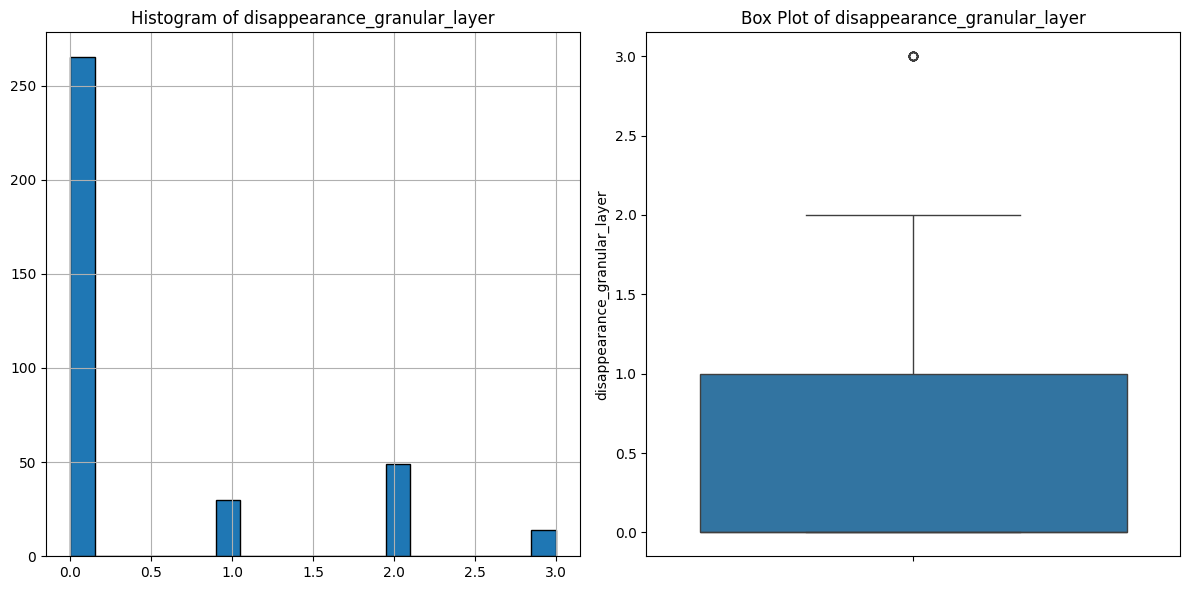

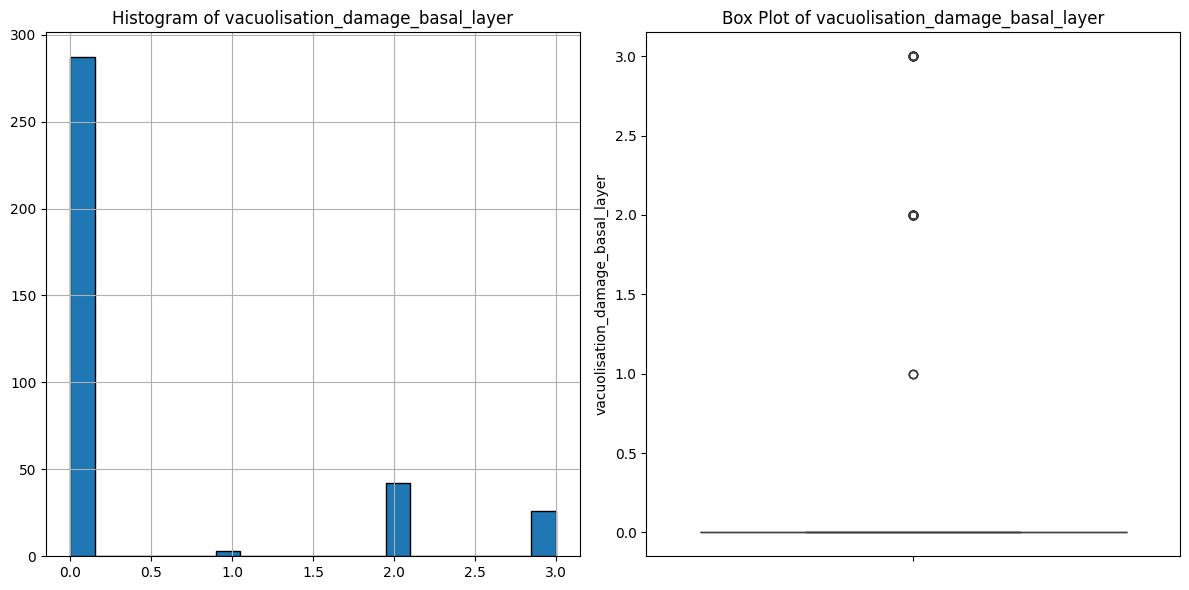

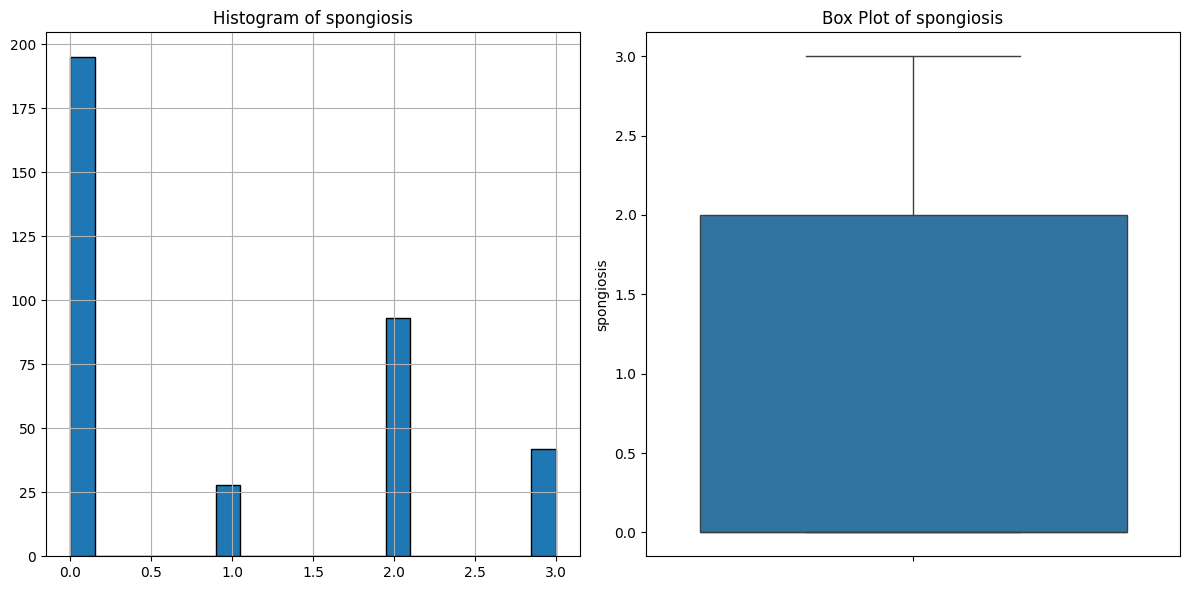

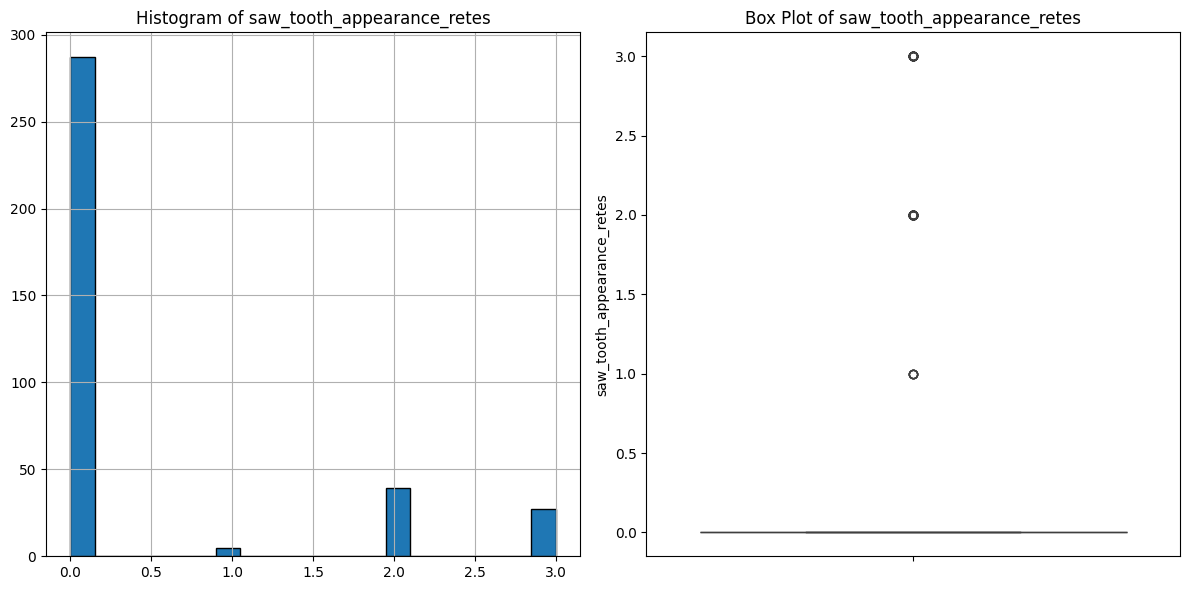

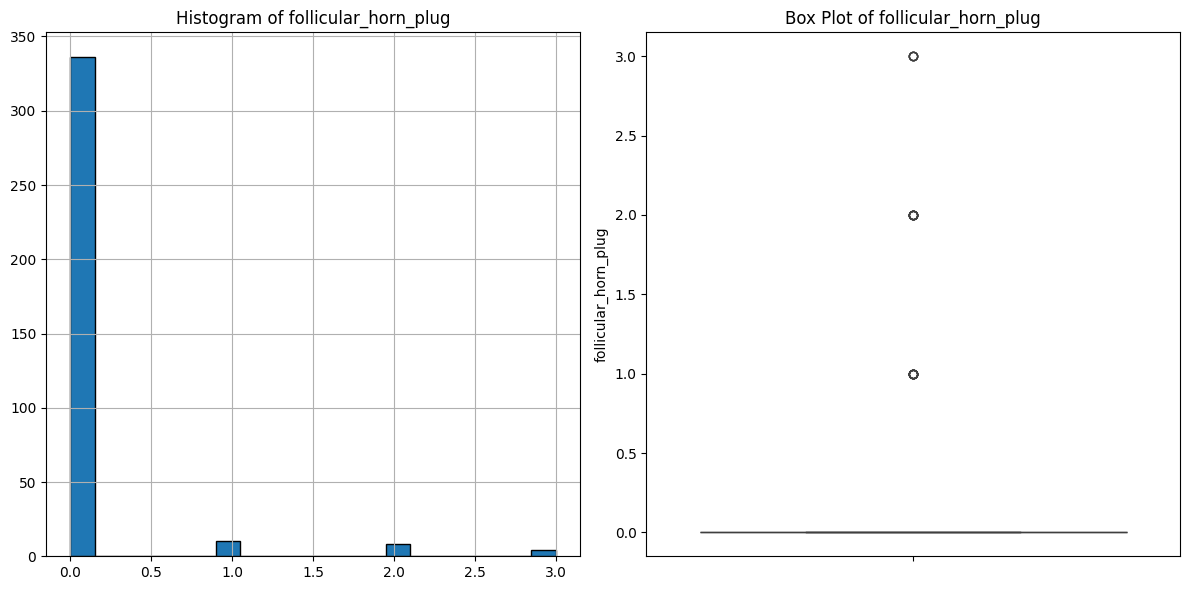

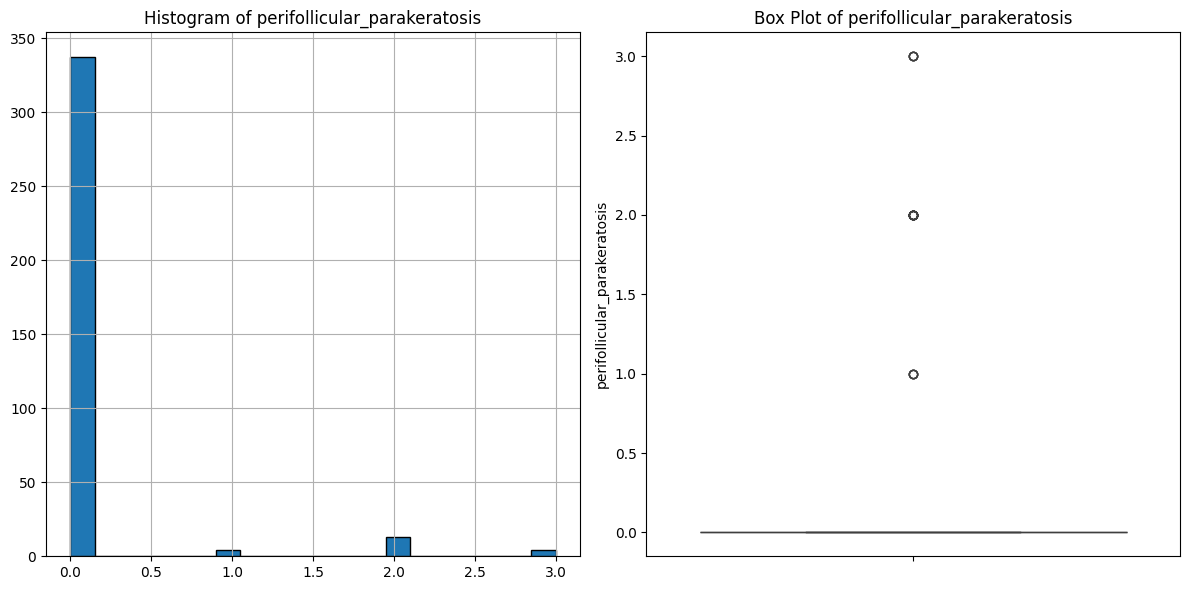

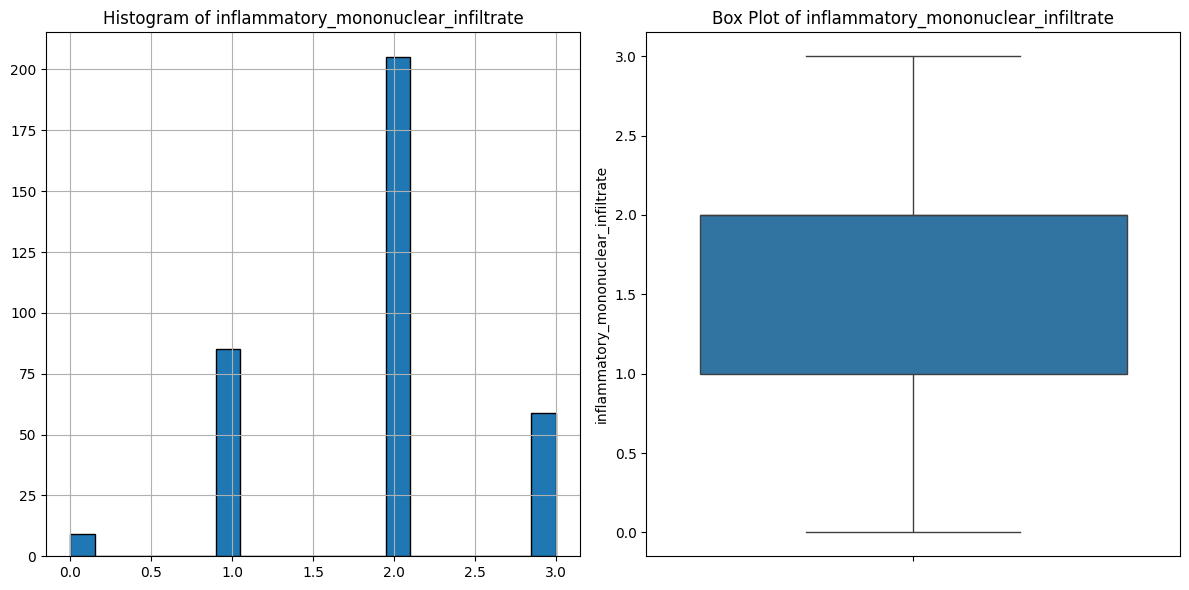

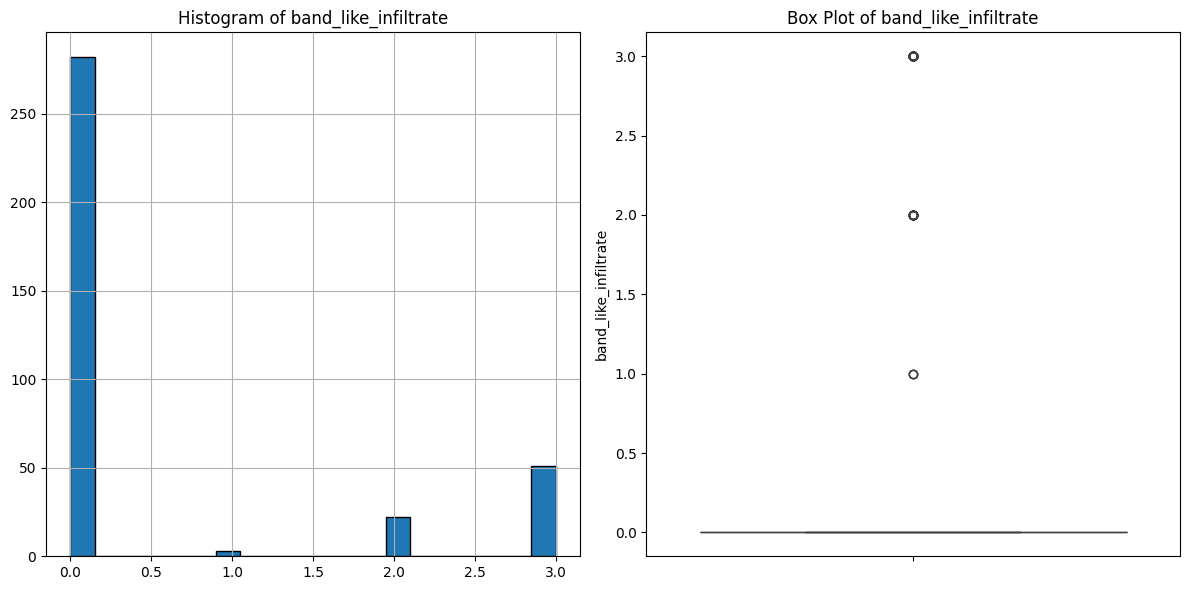

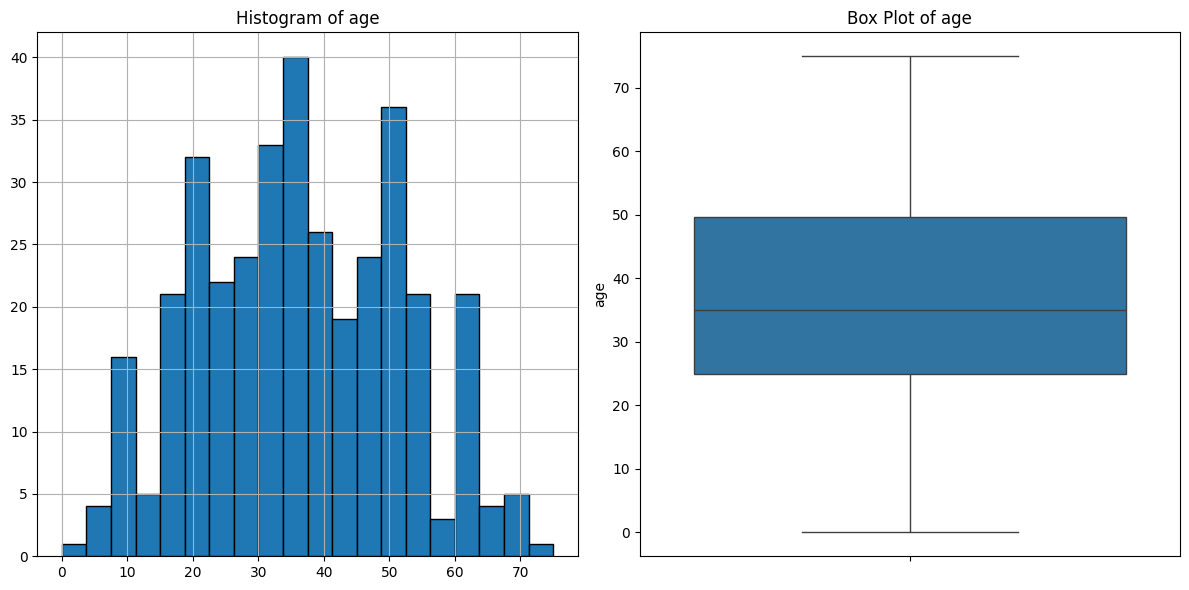

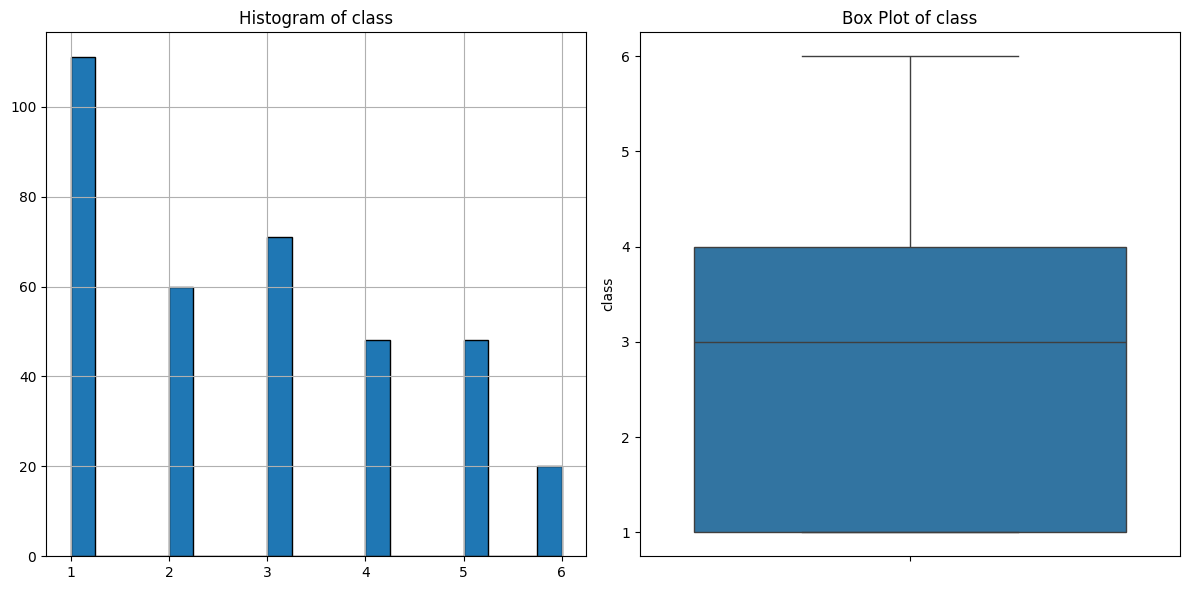

In [6]:
# histograms and box plots for each column
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()
